### __Setting up__

In [24]:
# Importing dependencies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(rc={'figure.figsize':(10,6)})
import warnings
warnings.filterwarnings('ignore')

In [25]:
# Loading in the datasets

customers = pd.read_csv("/content/Customers.csv")
subscriptions = pd.read_csv("/content/Subscriptions.csv")
views = pd.read_csv("/content/Views.csv")
billing = pd.read_csv("/content/Billing.csv")

### __Getting to know the Datasets__

In [26]:
# Getting the last 5 rows of each dataset

# I'll put the datasets in a dictionary so I carry out some of the explorations that apply to all the datasets at once, 
# and not have to repeat myself. I am using a dictionary because, in some cases, I also want to print the name of the dataset.

datasets_dict = {"Customers":customers, "Subscription": subscriptions, "Views":views, "Billing": billing}

for name, dataset in datasets_dict.items():
  print(name, "\n \n", dataset.tail(), "\n")
  #print(dataset.tail(), "\n")

Customers 
 
       CustomerID              Name    State  Age  Gender  \
2995        2996      Griffin Oteh  Plateau   25  Female   
2996        2997      Lenore Coker    Delta   57  Female   
2997        2998  Brian Adarabioyo     Yobe   44  Female   
2998        2999    Quentin Ameobi      Imo   35  Female   
2999        3000     Talon Abaribe    Kwara   73  Female   

                                               filename  
2995  C:\Users\Ihekamadu\Desktop\DS-ML-AI-Projects\P...  
2996  C:\Users\Ihekamadu\Desktop\DS-ML-AI-Projects\P...  
2997  C:\Users\Ihekamadu\Desktop\DS-ML-AI-Projects\P...  
2998  C:\Users\Ihekamadu\Desktop\DS-ML-AI-Projects\P...  
2999  C:\Users\Ihekamadu\Desktop\DS-ML-AI-Projects\P...   

Subscription 
 
    SubscriptionID     Plan  Monthly_Cost
0               1    Basic          2500
1               2  Premium          5000
2               3    Elite         10000 

Views 
 
       ViewsID  CustomerID       Genre       Format      Device  \
4995     4996   

A dirty data issue identified. I will be dropping the filename column. 



In [27]:
# Getting column information
for name, dataset in datasets_dict.items():
  print(name, "\n")
  print(dataset.info(), "\n")

Customers 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  3000 non-null   int64 
 1   Name        3000 non-null   object
 2   State       3000 non-null   object
 3   Age         3000 non-null   int64 
 4   Gender      3000 non-null   object
 5   filename    3000 non-null   object
dtypes: int64(2), object(4)
memory usage: 140.8+ KB
None 

Subscription 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SubscriptionID  3 non-null      int64 
 1   Plan            3 non-null      object
 2   Monthly_Cost    3 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 200.0+ bytes
None 

Views 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 co

There's already hint that there are no null values in any of the dataset. However, we can confirm in the data cleaning step.

In [28]:
# Getting summary statistics for numerical values in each dataset.

for name, dataset in datasets_dict.items():
  print(name, "\n")
  print(dataset.drop([colnames for colnames in dataset.columns if "ID" in colnames],axis=1).describe(), "\n")
# drop here, because the 'ID' columns are only in numeric type. They are for identification and dataset linkage and do not offer any computational relevance to our analysis.
#note that I am not dropping inplace. Only dropping to achieve the desired output for just this cell.

Customers 

               Age
count  3000.000000
mean     46.254000
std      16.599799
min      18.000000
25%      32.000000
50%      46.000000
75%      61.000000
max      75.000000 

Subscription 

       Monthly_Cost
count      3.000000
mean    5833.333333
std     3818.813079
min     2500.000000
25%     3750.000000
50%     5000.000000
75%     7500.000000
max    10000.000000 

Views 

       Viewing_Frequency  Total_Viewing_Time       Rating
count        5000.000000         5000.000000  5000.000000
mean            5.479800       298835.144000     3.013200
std             3.214227       177674.372424     1.234071
min             0.000000            6.000000     1.000000
25%             3.000000       140919.500000     2.000000
50%             5.000000       295446.500000     3.000000
75%             8.000000       454118.250000     4.000000
max            11.000000       604790.000000     5.000000 

Billing 

          Duration
count  3000.000000
mean      6.451667
std       3.171806


* Customers

The average age of subscribers is 46 but what's interesting is that the minimum age is 18. This may make sense as children or teenagers may not be able to sign up and maintain a cable TV account. Maximum age is 75. It is possible that this dataset is normally skewed. but, we'll see.

* Subscription

The average cost for a plan is about 5800 naira. A subscriber can get a plan as low as 2500 or as high as 10,000.

* Views

On average, viewing frequency is 5, with some subscribers not viewing at all. The highest viewing frequency is 11. Total viewing time, on average, is 298835 seconds. Some subscribers view for as short as 6 seconds while there are subscribers that view for as long as 604790 seconds.

On average, a show will get a rating of 3. Some shows get as low as 1 and some are rated utmostly high, with the maximum 5.

* Billing

Customers would typically subscribe for as long as 6 months. However, there are customers that subscribe for only one month and others that are consistent an entire year. 

### __Cleaning the Datasets.__

In [29]:
# Checking for duplicate records in the datasets

for name, dataset in datasets_dict.items():
  print(name, "\n \n", dataset.duplicated().sum(), "\n")

Customers 
 
 0 

Subscription 
 
 0 

Views 
 
 0 

Billing 
 
 0 



There are no duplicate records in any of the datasets.

In [30]:
# Confirming absence, or otherwise, of missing values.

for name, dataset in datasets_dict.items():
  print(name, "\n \n", dataset.isnull().sum(), "\n")

Customers 
 
 CustomerID    0
Name          0
State         0
Age           0
Gender        0
filename      0
dtype: int64 

Subscription 
 
 SubscriptionID    0
Plan              0
Monthly_Cost      0
dtype: int64 

Views 
 
 ViewsID               0
CustomerID            0
Genre                 0
Format                0
Device                0
Viewing_Frequency     0
Total_Viewing_Time    0
Rating                0
dtype: int64 

Billing 
 
 BillingID         0
CustomerID        0
SubscriptionID    0
Duration          0
dtype: int64 



No missing values in all four datasets.

Lastly for now, in the cleaning step, dropping the `filename` column in the 'customers' dataset. It doesn't provide any information relevant to the analysis nor contribute to any aspect of the data transformation process in this work. It only contains a link to the files in the local system where the data came from.

In [31]:
# Dropping `filename`

customers.drop("filename", axis= 1, inplace = True)

### __Merging the Datasets__

In [32]:
# I'll like the customer information to come first in the final dataset, followed by the subscription information 
# But there's no common column between these two. So, I'll first join the `views` data to the `billing` data,
# then join this to `subscription` and join the resulting data to the `customer` data.

subs_views_billing = subscriptions.merge(views.merge(billing, how = "inner", on = "CustomerID"), how = "inner", on= "SubscriptionID")
final_subscriptn_data = customers.merge(subs_views_billing, how = "inner", on = "CustomerID")
#.drop([colnames for colnames in .columns if "ID" in colnames],axis=1, inplace = True)
# I can still include the `customer` data in the first (nested) merge to get the final dataset but I am doing this seperately to make the code chunk neater.

final_subscriptn_data.head()

,CustomerID,Name,State,Age,Gender,SubscriptionID,Plan,Monthly_Cost,ViewsID,Genre,Format,Device,Viewing_Frequency,Total_Viewing_Time,Rating,BillingID,Duration
0,1,Jelani Sofoluwe,Akwa,35,Male,1,Basic,2500,1,Religion,TV-Shows,Decoder,4,72777,4,1,4
1,1,Jelani Sofoluwe,Akwa,35,Male,1,Basic,2500,4197,Talk-Shows,Live-Events,Tv-App,8,582325,2,1,4
2,2,Lee Balarabe,Jigawa,66,Male,2,Premium,5000,2,Comedy,Live-Events,Tv-App,5,251472,2,2,1
3,2,Lee Balarabe,Jigawa,66,Male,2,Premium,5000,3500,Action,Live-Events,Decoder,6,550930,4,2,1
4,3,Lawrence Akinde,Plateau,64,Male,2,Premium,5000,3,Comedy,TV-Shows,Tv-App,11,137732,4,3,3


From the merge, notice the value, 'Akwa', in the state column? There's no state in  Nigeria called 'Akwa'. The closest to this name, is 'Awka', the capital of Anambra state.

A solution will be to add 'Akwa' subscribers to those from Anambra. 

In [33]:
# Renaming 'Akwa' as 'Anambra' in ``State` column

final_subscriptn_data.loc[final_subscriptn_data.State == "Akwa", "State"] = "Anambra"

# Confirming the change

final_subscriptn_data[final_subscriptn_data.State == "Akwa"]

,CustomerID,Name,State,Age,Gender,SubscriptionID,Plan,Monthly_Cost,ViewsID,Genre,Format,Device,Viewing_Frequency,Total_Viewing_Time,Rating,BillingID,Duration


### __Exploring the merged data (EDA)__

In [34]:
# Getting an idea of the number of unique customers on the platform. Using value_counts() so as to reveal any other insight that may be important.

final_subscriptn_data.CustomerID.value_counts()

115     6
1706    5
2291    5
1214    5
1094    5
       ..
1295    1
1292    1
1290    1
1288    1
3000    1
Name: CustomerID, Length: 3000, dtype: int64

There are three thousand unique customers on the cable TV platform. 

The customer watching the most shows, 6, is the one with customerid '115'. Let's find out the name and profile of this customer.

In [35]:
final_subscriptn_data[final_subscriptn_data.CustomerID == 115]

,CustomerID,Name,State,Age,Gender,SubscriptionID,Plan,Monthly_Cost,ViewsID,Genre,Format,Device,Viewing_Frequency,Total_Viewing_Time,Rating,BillingID,Duration
197,115,Shaine Abagun,Plateau,51,Male,2,Premium,5000,115,Comedy,TV-Shows,Mobile-App,8,180380,1,115,10
198,115,Shaine Abagun,Plateau,51,Male,2,Premium,5000,3876,Action,Live-Events,Tv-App,4,556373,2,115,10
199,115,Shaine Abagun,Plateau,51,Male,2,Premium,5000,3978,Music,TV-Shows,Decoder,10,224497,3,115,10
200,115,Shaine Abagun,Plateau,51,Male,2,Premium,5000,4628,Documentaries,Live-Events,Decoder,4,166758,4,115,10
201,115,Shaine Abagun,Plateau,51,Male,2,Premium,5000,4800,Talk-Shows,TV-Shows,Decoder,8,397647,4,115,10
202,115,Shaine Abagun,Plateau,51,Male,2,Premium,5000,4819,Comedy,TV-Shows,Tv-App,9,321909,4,115,10


The customer's name is Shaine Abagun. He is male, from Plateau state, 51 years old and, a premium subscriber (is 'premium'the most expensive plan? We'll confirm). 

He watches programs around comedy, action, music, documentaries, and Talk-Shows. Of these shows, the subscrber watches music the most. He is generally a frequent viewer of the shows across these genres, with action and documentary being the genres he watches the least frequently. He is currently on a 10 month-subscription. Shaine Abagun seems like a loyal subscriber.

How many other customers are on the premium plan and how many are on other plans? 

We'll also confirm or disprove that premium is the most expensive plan.

__Which plan is the most subscribed?__



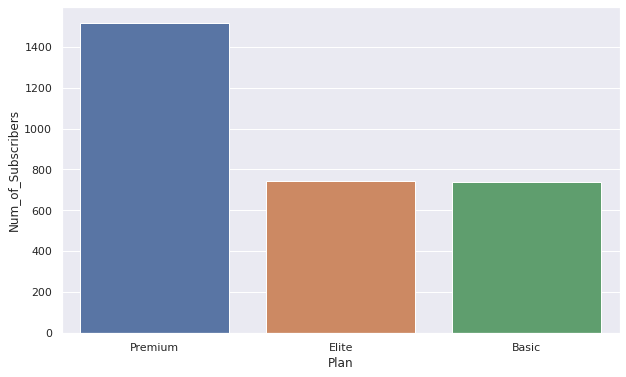

In [36]:
# Counting number of subscribers on each plan

sns.barplot(data = final_subscriptn_data[["CustomerID", "Plan"]].drop_duplicates().groupby("Plan")["CustomerID"].count().reset_index().rename({"CustomerID": "Num_of_Subscribers"}, axis = 1).sort_values("Num_of_Subscribers", ascending = False), 
            x = "Plan", 
            y = "Num_of_Subscribers") 

# Subsetting out the two needed columns for this insight and dropping duplicate records because subscription plan was repeated for each customer in the original, combined dataset.
# We need it to be counted uniquely for each customer.

The premium subscription plan has the highest number of subscribers, so, it is most preferred among customers. There are 1516 other premium subscribers alongside Shaine Abagun. The basic plan has the least, with 738 subscribers.

__Which plan is the most expensive?__

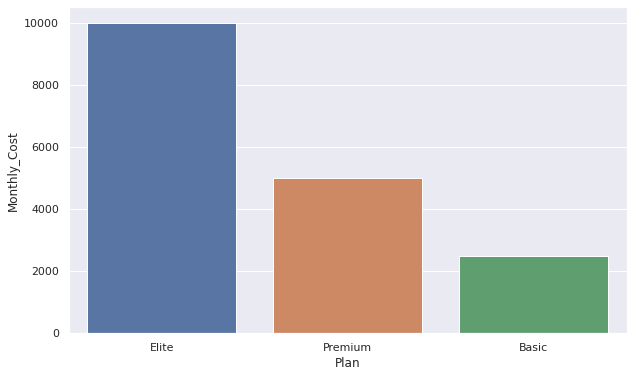

In [37]:
# Most expensive subscription plan

sns.barplot(data= final_subscriptn_data.groupby("Plan")[["Monthly_Cost"]].mean().reset_index().sort_values("Monthly_Cost", ascending = False), 
            x= "Plan", 
            y= "Monthly_Cost")

The most expensive plan is the elite plan. This may provide an explanation for the popularity of the premium subscription amongst subscribers. They probably do not want to purchase a lower plan like basic, that, most likely, offers much less shows than the others but also do not want to break the bank to purchase an 'elite' subscription. Although, the chart before this one shows, surprisingly, that elite subscription too surpased basic, just slightly in this case.

__Does the choice of subscription plan differ by gender?__

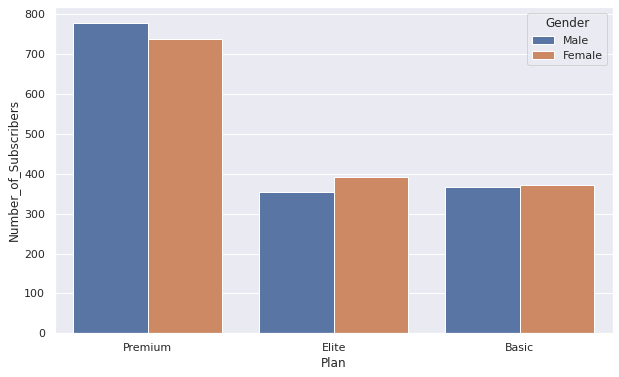

In [38]:
sns.barplot(data = final_subscriptn_data[["CustomerID", "Plan", "Gender"]].drop_duplicates().groupby(["Plan", "Gender"])["CustomerID"].count().reset_index().rename({"CustomerID": "Number_of_Subscribers"}, axis = 1).sort_values("Number_of_Subscribers", ascending = False), 
            x = "Plan", 
            y = "Number_of_Subscribers", hue = "Gender")

Generally, the choice of subscription plan is nearly the same for male and female. Although noticable, but slight difference is seen with the premium and elite plans for which, there are slightly more male than female subscribers and slightly more female than male subscribers respectively. 

__Which states have the highest number of subscribers for each plan?__

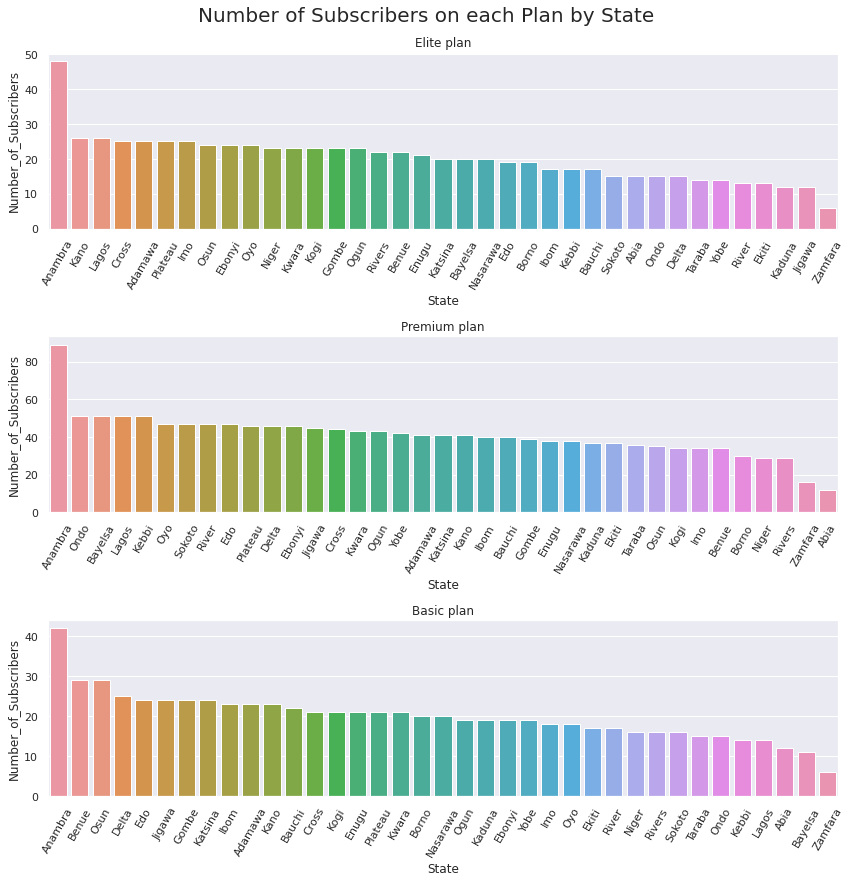

In [39]:
# Due to the number of states, let's subset by each plan to check the number of subscribers on each plan by state.

# Grouping ans aggregating number of subscribers on each plan by state into new variables.

elite_state_subs = final_subscriptn_data[["CustomerID", "Plan", "State"]].drop_duplicates()[final_subscriptn_data["Plan"] == "Elite"].groupby(["Plan", "State"])[["CustomerID"]].count().reset_index().rename({"CustomerID": "Number_of_Subscribers"}, axis = 1).sort_values("Number_of_Subscribers", ascending = False)
premium_state_subs = final_subscriptn_data[["CustomerID", "Plan", "State"]].drop_duplicates()[final_subscriptn_data["Plan"] == "Premium"].groupby(["Plan", "State"])[["CustomerID"]].count().reset_index().rename({"CustomerID": "Number_of_Subscribers"}, axis = 1).sort_values("Number_of_Subscribers", ascending = False)
basic_state_subs = final_subscriptn_data[["CustomerID", "Plan", "State"]].drop_duplicates()[final_subscriptn_data["Plan"] == "Basic"].groupby(["Plan", "State"])[["CustomerID"]].count().reset_index().rename({"CustomerID": "Number_of_Subscribers"}, axis = 1).sort_values("Number_of_Subscribers", ascending = False)

fig, axes = plt.subplots(3, 1, figsize=(12, 12))

sns.barplot(data= elite_state_subs, x = "State", y = "Number_of_Subscribers", ax= axes[0])
sns.barplot(data= premium_state_subs, x = "State", y = "Number_of_Subscribers", ax= axes[1])
sns.barplot(data= basic_state_subs, x = "State", y = "Number_of_Subscribers", ax= axes[2])

fig.suptitle("Number of Subscribers on each Plan by State", y = 1.02, fontsize = 20)

axes[0].set_xticklabels(labels = elite_state_subs.State, rotation=60)
axes[1].set_xticklabels(labels = premium_state_subs.State, rotation=60)
axes[2].set_xticklabels(labels = basic_state_subs.State, rotation=60)

axes[0].set_title("Elite plan")
axes[1].set_title("Premium plan")
axes[2].set_title("Basic plan")

fig.tight_layout()

plt.show()


* Anambra has the most elite, premium and basic subscribers. 

* Zamfara has the least number for both elite and basic plans while Abia beats Zamfara to the last position for number of premium subscriptions.

__Does the plan influence the duration?__

In [41]:
# Checking if each plan has its own duration

final_subscriptn_data[["CustomerID", "Plan", "Duration"]].drop_duplicates().groupby(["Plan", "Duration"])[["CustomerID"]].count()

#.reset_index().rename({"CustomerID": "Num_of_Subscribers"}, axis = 1).sort_values("Num_of_Subscribers", ascending = False)

CustomerID
Plan    Duration            
Basic   1                 32
        2                 61
        3                 79
        4                 77
        5                 63
        6                 67
        7                 67
        8                 68
        9                 75
        10                50
        11                70
        12                29
Elite   1                 35
        2                 72
        3                 59
        4                 66
        5                 81
        6                 63
        7                 58
        8                 68
        9                 74
        10                76
        11                63
        12                30
Premium 1                 68
        2                144
        3                133
        4                137
        5                135
        6                148
        7                140
        8                131
        9                153
        10               140
        11               126
        12                62

No, the plan does not determine the duration. There are 12-month-long basic subscribers and there are elite subscriptions that only last for a month.

Compared to other durations, 1-month-long and 12-month-long subscriptions are the least common.

__Which subscription plan has brought in the most revenue?__

Although we already know that the premium plan has the most subscribers, however, we also know that the elite plan is the most expensive- twice as expensive as the premium plan- even though it has just about half the number of subscribers as that of the premium plan. Therefore, it does stand a chance to bring in more revenue than the premium plan would. So, let's check confirm.

In [57]:
# Revenue per subscription plan.

final_subscriptn_data[["CustomerID", "Plan", "Monthly_Cost"]].drop_duplicates().groupby("Plan")[["Monthly_Cost"]].sum().reset_index().rename({"Monthly_Cost": "Total_Revenue"}, axis = 1).sort_values("Total_Revenue", ascending = False)

,Plan,Total_Revenue
2,Premium,7585000
1,Elite,7450000
0,Basic,1845000


The premium plan has brought in the most revenue. However, we cannot ignore that revenue from the elite subscription, even with the number of subscribers as low as half that of premium subscibers, comes really close.

In [42]:

views.Genre.value_counts()

Comedy           916
Talk-Shows       490
News             457
Reality          456
Cartoons         452
Sports           448
Music            447
Documentaries    440
Action           439
Drama            247
Religion         208
Name: Genre, dtype: int64